# OSMNX learning
Maybe an easier method than using Overpy because it natively creates geodataframes

In [3]:
import pandas as pd
import json
import numpy as np
import geopandas as gpd
import contextily as cx
import geopy.distance
from shapely.geometry import MultiPolygon, Polygon, Point, LineString
import osmnx as ox
import pyproj
import os
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib import patches

%matplotlib inline

'https://mt1.google.com/vt/lyrs=s&x={x}&y={y}&z={z}'

In [12]:
# Load nation lakes coords   
with open("nation_lakes.json") as f:
    lakes = json.load(f)
print("\nlakes:")
for i,lake in enumerate(lakes):
    print(i,lake["name"])


lakes:
0 Tsayta Lake
1 Indata Lake
2 Tchentlo Lake
3 Chuchi Lake


In [50]:
place = lakes[2]
place_name = place["name"].replace(" ", "-")
print(place["name"])

with open("osm_tags.json") as f:
    desired_tags = json.load(f)
print(json.dumps(desired_tags, indent=2))

Tchentlo Lake
{
  "leisure": [
    "park",
    "nature_reserve"
  ],
  "tourism": [
    "camp_site"
  ],
  "highway": [
    "motorway",
    "trunk",
    "primary",
    "secondary",
    "tertiary",
    "unclassified",
    "track",
    "road",
    "path",
    "footway"
  ],
  "water": [
    "lake",
    "river"
  ]
}


In [14]:
gdf = ox.features.features_from_bbox(place["north"], place["south"], place["east"], place["west"], desired_tags)
gdf = gdf.to_crs(epsg=3857) # project to spherical mercator to match tiles
gdf.reset_index(inplace=True)
cols_to_keep = ['element_type', 'geometry', 'name'] + [key for key in desired_tags.keys() if key in gdf.columns]
gdf = gdf[cols_to_keep]
gdf

,element_type,geometry,name,leisure,tourism,highway,water
0,node,POINT (-13927251.135 7397750.565),NaN,NaN,camp_site,NaN,NaN
1,node,POINT (-13893037.802 7401149.038),Ahdatay,NaN,camp_site,NaN,NaN
2,node,POINT (-13897530.267 7405154.215),Ahdatay Creek Provincial Site,NaN,camp_site,NaN,NaN
3,node,POINT (-13902276.529 7402844.979),Miner's Camp,NaN,camp_site,NaN,NaN
4,node,POINT (-13903632.690 7405950.229),NaN,NaN,camp_site,NaN,NaN
5,node,POINT (-13905395.523 7404803.671),Pine Point,NaN,camp_site,NaN,NaN
6,node,POINT (-13909000.004 7403426.024),NaN,NaN,camp_site,NaN,NaN
7,node,POINT (-13911881.920 7399091.207),NaN,NaN,camp_site,NaN,NaN
8,node,POINT (-13921971.006 7400055.029),NaN,NaN,camp_site,NaN,NaN
9,node,POINT (-13929125.632 7397623.363),Progress Point,NaN,camp_site,NaN,NaN


In [15]:
elements = gdf.to_dict(orient = "records")

In [16]:
api_key="87e81a5a-4136-409e-92dd-10c6a1a3cb9d"

# Get background tiles

In [17]:
def lonlat_to_xy(lon: float, lat: float):
    """Converts coordinates from EPSG4326 (lon,lat) to EPSG3857(x,y)"""
    proj = pyproj.Transformer.from_crs(4326, 3857, always_xy=True)
    return proj.transform(lon,lat)

def xy_to_lonlat(x: float,y: float):
    """Converts coordinates from EPSG3857(x,y) to EPSG4326 (lon,lat)"""
    proj = pyproj.Transformer.from_crs(3857, 4326, always_xy=True)
    return proj.transform(x,y)


In [38]:
west,east,south,north = place["west"], place["east"], place["south"], place["north"]
zoom_level = cx.tile._calculate_zoom(west,south,east,north) + 1  


STAMEN_API_KEY = os.environ["STAMEN_API_KEY"]
with open("tiles.json") as f:
    tiles = json.load(f)
# tiles_source = tiles["StamenTonerLite"].replace("API_KEY", STAMEN_API_KEY)

tiles_source="https://tiles.stadiamaps.com/tiles/stamen_toner_lite/{z}/{x}/{y}{r}.png?api_key=87e81a5a-4136-409e-92dd-10c6a1a3cb9d"
img, ext = cx.bounds2raster(west,south, east, north, f"{place_name}.tif", zoom_level, source=tiles_source, ll=True)


In [29]:
# tiles

In [30]:
def calculate_plot_dimensions(plot_max_dim, dx, dy):
    
    if dx >= dy:
        plot_width_in = plot_max_dim
        plot_height_in = plot_width_in * dy / dx
    else:
        plot_height_in = plot_max_dim
        plot_width_in = plot_height_in * dx / dy

    return (plot_width_in, plot_height_in)

def extract_coords(geom):
    """Extracts a list of coordinates ((x,y) tuples) for the geometry"""
    coords = []
    
    if geom.geom_type in ["Point", "LineString"]:
        coords.append(geom.coords[:])
    elif geom.geom_type == "Polygon":
        polygon_coords = extract_polygon_coords(geom)
        # print(f"polygon coords: {len(polygon_coords)}")
        coords.extend(polygon_coords)
    elif geom.geom_type == "MultiPolygon":
        polygons = [polygon for polygon in geom.geoms]
        for polygon in polygons:
            coords.extend(extract_polygon_coords(polygon))
    return coords

def extract_polygon_coords(polygon):
    """Extracts a list of coordinates ((x,y) tuples) for exterior and interiors of Shapely Polygon
    PARAMETERS:
        geom: Shapely Polygon object
    RETURNS:  
        list of coordinate lists, eg[[(x1,y1),(x2,y2)...],[(x1,y1),(x2,y2)...], ....]]
    """
    coords = []
    if polygon.geom_type == 'Polygon':
        coords.append(polygon.exterior.coords[:])
        for interior in polygon.interiors:
            coords.append(interior.coords[:])
    else:
        raise ValueError('Unhandled geometry type: ' + repr(geom.geom_type))
    return coords


def get_style(element, tag_styles, styles):
    style = {}
    for key,value in element.items():
        if key in tag_styles:
            if value in tag_styles[key]:
                style = styles[tag_styles[key][value]]
    return style

In [31]:
# convert to EPSG3857
x_min, y_min = lonlat_to_xy(west, south)
x_max, y_max = lonlat_to_xy(east, north) 
dy = y_max - y_min
dx = x_max - x_min


plot_dim = 10
figsize = calculate_plot_dimensions(plot_dim, dx, dy)
figsize

(10, 3.742437339966413)

In [79]:
node_marker_size = plot_dim * 0.5
annotation_text_size = plot_dim * 0.4
thick_line_width = plot_dim * 0.1
med_line_width = plot_dim * 0.05
thin_line_width = plot_dim * 0.025


styles = {
    "main_road": {"color":"gray", "linewidth":thick_line_width},
    "secondary_road": {"color":"gray", "linewidth":med_line_width},
    "tertiary_road": {"color":"gray", "linewidth":thin_line_width},
    "trail":{"color":"gray", "linewidth":thin_line_width, "linestyle": "--"},
    "campsite": {"marker": "o", "ms": node_marker_size, "mew":0.5, "mfc":"none", "mec":"green", "alpha": 0.9, "linestyle": "",},
    "lake": {"color":"blue", "linewidth":thin_line_width, "alpha": 0.8},
    "river": {"color":"blue", "linewidth":thin_line_width, "alpha": 0.5},
    # "barrier": {"marker": "x", "ms": node_marker_size*0.5, "color":"black", "alpha": 0.75, "linestyle": ""},
    "mountain": {"marker": "+", "ms": node_marker_size*0.5, "color":"black", "mew":0.5, "mfc":"none","linestyle": ""},
    "attraction": {"marker": "*", "ms": node_marker_size*0.5, "mfc":"none", "mec":"blue", "alpha": 0.5, "linestyle": ""},
    "park": {"color":"green", "linewidth":thick_line_width, "linestyle": ":", "alpha":0.5},
    # "scale_bar": {"color":"grey", "linewidth":thick_line_width*2, "linestyle": "-", "alpha":0.5}
    
}

In [80]:
tag_styles = {
    "tourism": {
        "camp_site": "campsite"
    },
    "natural": {
        "peak": "mountain",
        "mountain_range": "mountain",
        "spring": "attraction",
    },
    "barrier": {
        "yes": "barrier",
    },
    "water": {
        "lake": "lake",
        "river": "river",
    },
    'highway': {
        "motorway": "secondary_road",
        "trunk":  "secondary_road",
        "primary": "secondary_road",
        "secondary": "tertiary_road",
        "tertiary": "tertiary_road",
        "unclassified": "tertiary_road",
        "track": "tertiary_road",
        "road": "tertiary_road",
        "path": "trail",
        "footway": "trail",
    },
    'leisure': {
        "nature_reserve": "park",
        "park": "park",
    },
}

In [81]:
def add_legend(ax, annotation_text_size, legend_items, loc=(0,0)):
    legend = ax.legend(
    handles=[Line2D([0], [0], label=l.capitalize().replace("_", " "), **styles[l]) for l in legend_items], 
    title = " Legend", 
    alignment='left',
    title_fontsize = annotation_text_size+1,
    # loc='lower left',
    loc=loc,
    fontsize=annotation_text_size,
    borderpad=1.5,
    framealpha=1);
    return ax

In [82]:
place_name

'Tchentlo-Lake'

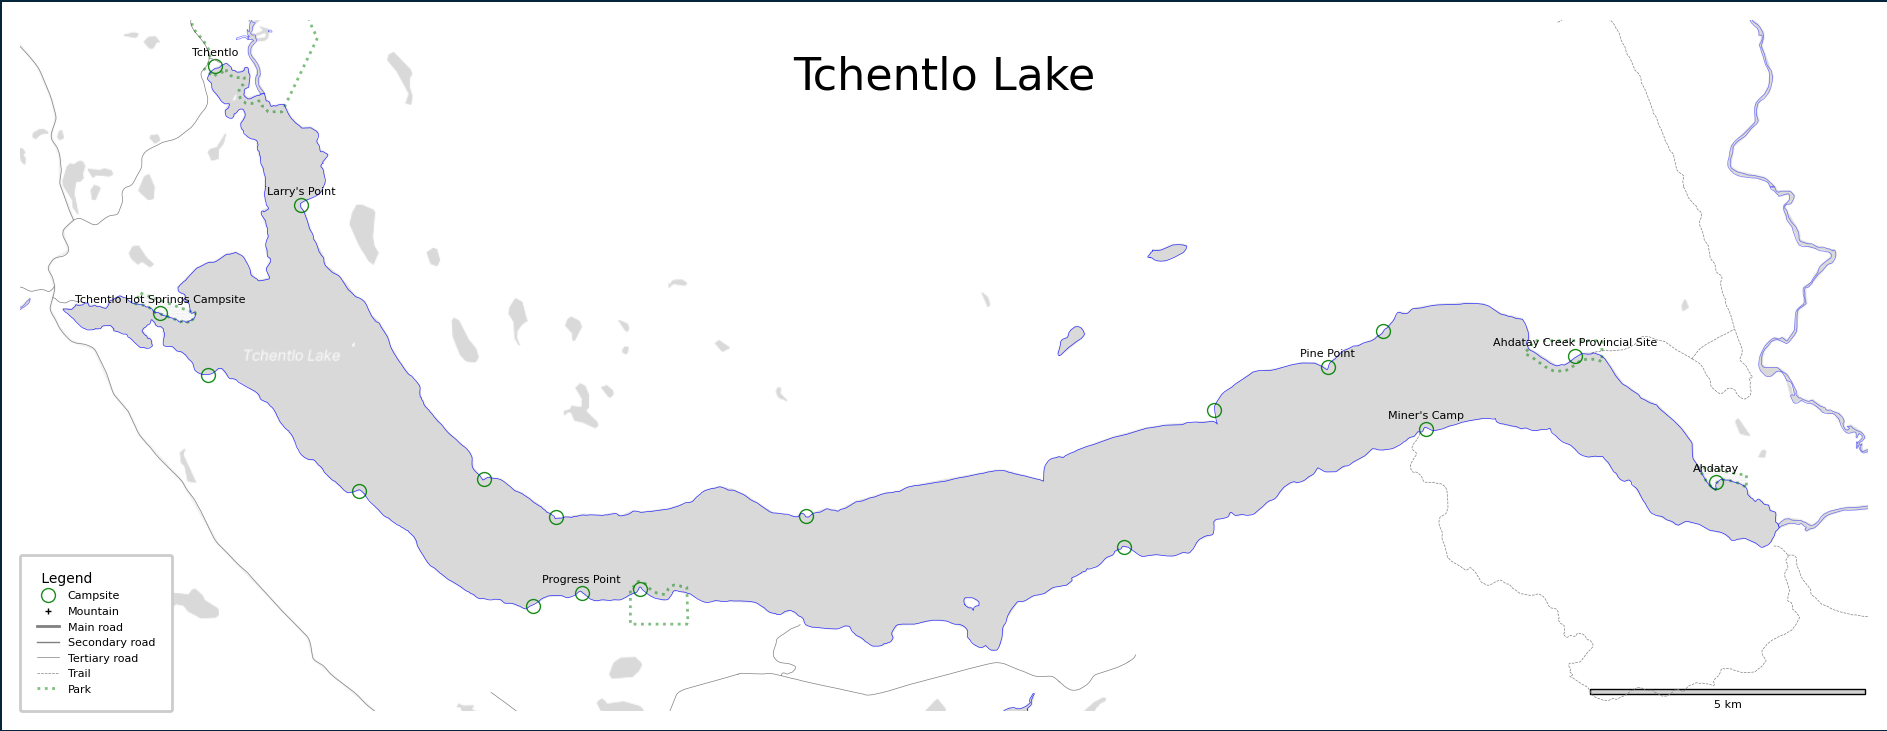

In [86]:
# make fig with backgound tiles
fig,ax = plt.subplots(1, figsize=figsize,linewidth=1, edgecolor="#04253a")
ax.set(xlim=(x_min, x_max), ylim=(y_min, y_max))
fig.set_dpi(200)
ax.set_axis_off() # don't display axes with coordinates

cx.add_basemap(ax, source = tiles_source, zoom=zoom_level);

# Plot features from OSM
for element in elements:
    # get coordinates to plot for this element
    element_type = element["element_type"]
    coords_list = extract_coords(element["geometry"])
    for coords in coords_list:
        x,y = zip(*coords)
        ax.plot(x,y,**get_style(element, tag_styles, styles))
    if (element_type == "node" and type(element["name"])!=float):
        ax.annotate(element["name"], (x[0],y[0]), 
                    size=annotation_text_size, 
                    xycoords='data', 
                    xytext=(0, node_marker_size*0.75), 
                    textcoords='offset points', 
                    ha='center');
# Add legend
legend_items = ["campsite", "mountain", "main_road", "secondary_road", "tertiary_road", "trail", "park"]
legend_loc = (0.,0)
ax = add_legend(ax, annotation_text_size, legend_items, legend_loc)

# Add distance scale bar
scale_width_pct = 0.15
scale_anchor_fig = (1-scale_width_pct, 0.025)
scale_anchor_xy = fig_to_xy(scale_anchor_fig,x_min,x_max,y_min,y_max)

ax = add_scale_bar(ax, scale_width_pct, scale_anchor_xy, west, east, south, north)

# Add map title
ax.annotate(place["name"], fig_to_xy((0.5,0.9),x_min,x_max,y_min,y_max), ha='center', va = "baseline", size=annotation_text_size*4);
plt.tight_layout(pad=1)
plt.savefig(f'{place_name}.png') 

In [41]:
def get_scale_unit(plot_width_km: float,scale_width_pct: float):
    """Determines the size of the scale bar in kilometers
    PARAMETERS:
        plot_width_km
        scale_width_pct
    RETURNS:
    """
    scale_units = [1,2,5,10,20,50]
    for scale_unit in scale_units[::-1]:
        scale = plot_width_km * scale_width_pct
        if scale >= scale_unit:
            break
    return scale_unit

In [42]:
def xy_to_fig(xy, x_min, x_max, y_min, y_max):
    x_fig = (xy[0] - x_min)/(x_max - x_min)
    y_fig = (xy[1] - y_min)/(y_max - y_min)
    return x_fig, y_fig

def fig_to_xy(xy_fig,x_min,x_max,y_min,y_max):
    x = xy_fig[0] * (x_max - x_min) + x_min
    y = xy_fig[1] * (y_max - y_min) + y_min
    return x,y


In [43]:
def add_scale_bar(ax, scale_width_pct, anchor, west, east, south, north):
    # anchor_x, anchor_y = anchor
    plot_width_km = geopy.distance.geodesic((south,east), (south,west)).km
    scale_unit = get_scale_unit(plot_width_km,scale_width_pct)
    width = scale_unit / plot_width_km * dx
    height = max(dx,dy)*0.0025

    anchor_x, anchor_y = anchor

    # Create a Rectangle patch for scale bar
    
    bar = patches.Rectangle(
        xy=anchor, 
        width = width, 
        height = height, 
        linewidth=0.5,
        edgecolor='black',
        facecolor='lightgrey',
        fill=True
    )
    ax.add_patch(bar)
    
    # Add annotation
    ax.annotate(
        f"{scale_unit} km", 
        xy=(anchor_x + width/2 , anchor_y ), 
        xycoords='data', 
        # xy = anchor,
        # xycoords = ax.transLimits,
        size=annotation_text_size, 
        xytext = (0,-5),
        textcoords = "offset points",
        ha='center',
    )
    return ax

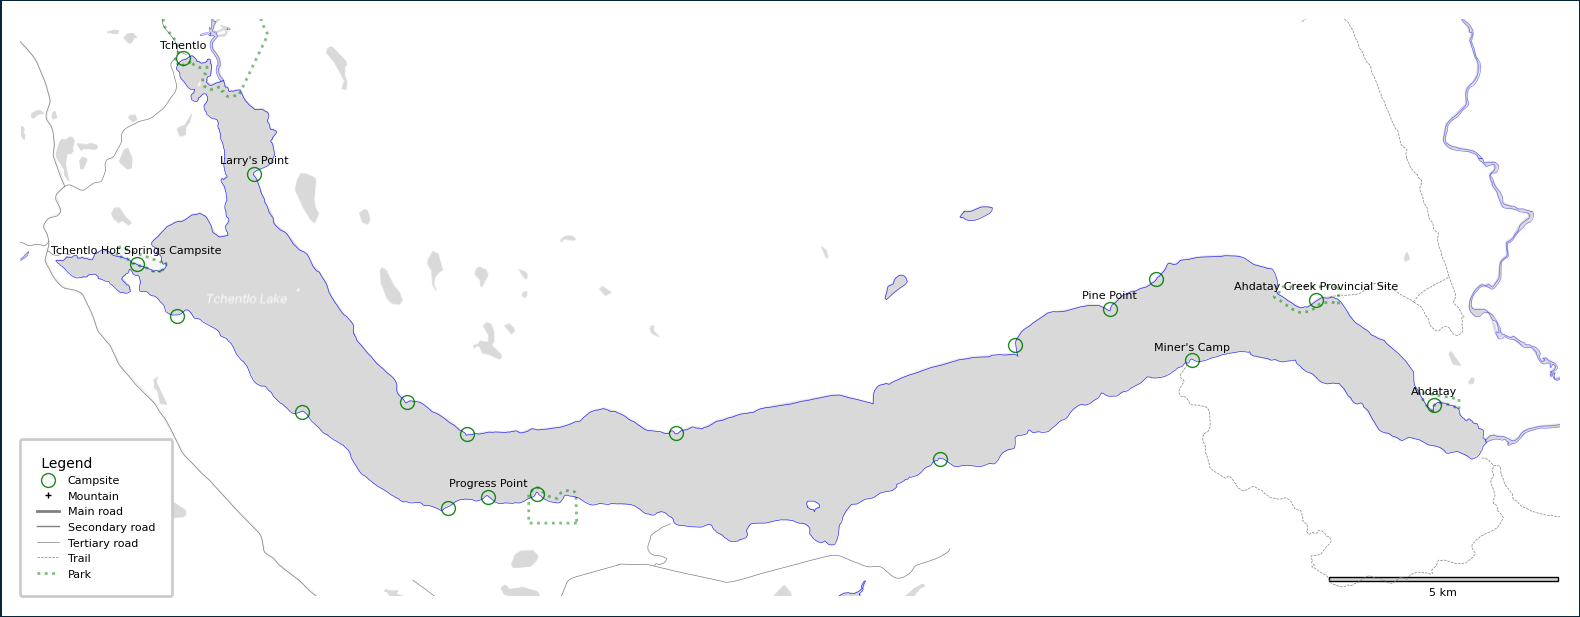

In [20]:
scale_width_pct = 0.15

scale_anchor_fig = (1-scale_width_pct, 0.025)
scale_anchor_xy = fig_to_xy(scale_anchor_fig,x_min,x_max,y_min,y_max)

ax = add_scale_bar(ax, scale_width_pct, scale_anchor_xy, west, east, south, north)
fig

In [421]:
legend_loc

(0.0, 0)

scale_unit = 2km


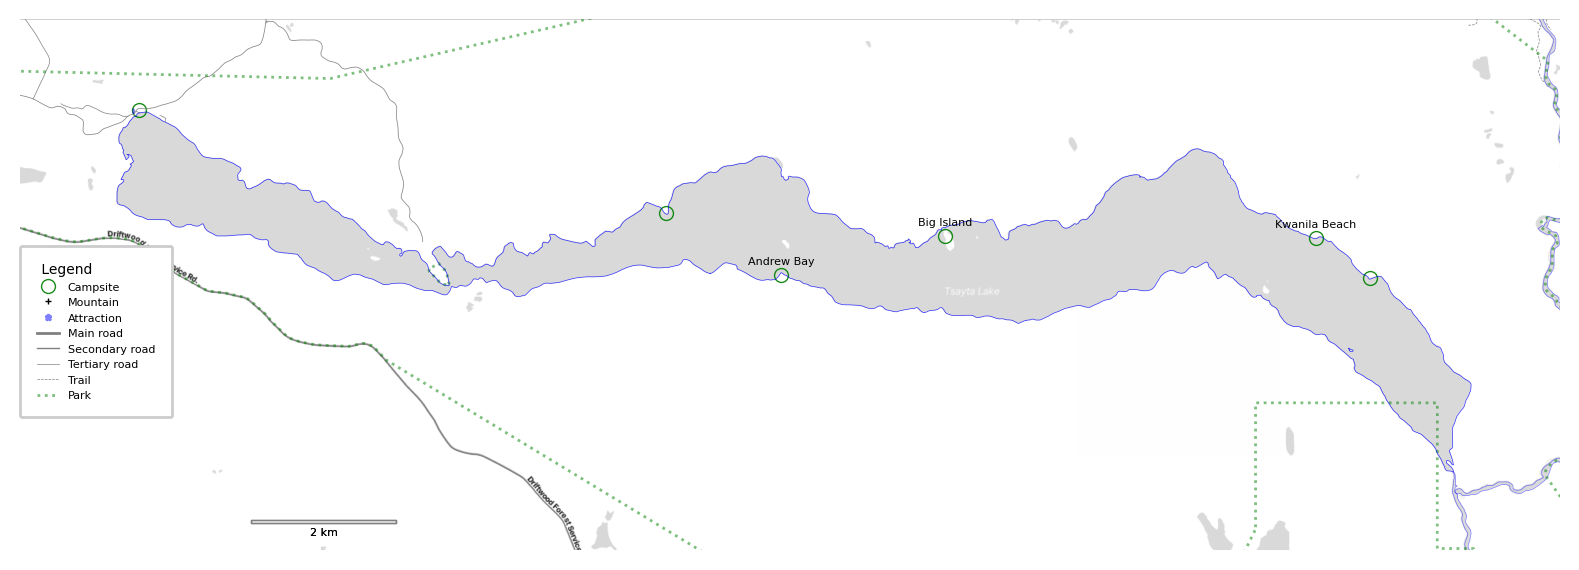

In [273]:
scale_width_pct = 0.22 # maximum width of the scale bar as % of map

plot_width_km = geopy.distance.geodesic((south,east), (south,west)).km
scale_unit = get_scale_unit(plot_width_km,scale_width_pct)
print(f"scale_unit = {scale_unit}km")
scale_unit_pct = scale_unit / plot_width_km

scale_width = scale_unit_pct * dx
scale_height = max(dx,dy)*0.0025

scale_anchor_x = x_min + 0.15 * dx 
scale_anchor_y = y_min + 0.05 * dy

# Create a Rectangle patch for scale bar
bar = patches.Rectangle(
    xy=(scale_anchor_x,scale_anchor_y), 
    width = scale_width, 
    height=scale_height, 
    linewidth=0.5,
    edgecolor='grey',
    facecolor='none',
    # color = "grey"
)
ax.add_patch(bar)

# Add annotation
ax.annotate(
    f"{scale_unit} km", 
    xy=(scale_anchor_x + scale_width/2 , scale_anchor_y - 3*scale_height), 
    size=annotation_text_size, 
    xycoords='data', 
    ha='center',
    color="black"
)
fig

In [361]:
x_min, y_max

(-13946987.63854772, 7415861.076002616)

In [362]:
x,y = ax.transLimits.transform((x_min, y_max))
x,y

(0.0, 1.0)

In [363]:
ax.transData.inverted().transform((x,y))

array([-13956719.26363818,   7390762.30005157])

In [25]:
# plt.savefig('figure.png') 
# plt.show()

<Figure size 640x480 with 0 Axes>

In [137]:
east - west



0.3346550293247361

In [138]:
north - south

0.06542549902331984